In [11]:
pip install numpy pandas scikit-learn matplotlib nltk seaborn wordcloud xgboost

Looking in indexes: https://pypi.ci.artifacts.walmart.com/artifactory/api/pypi/pythonhosted-pypi-release-remote/simple
You should consider upgrading via the '/Users/r0c0hjm/DATA_ML_TEAM/machine_learning/SPAM_SMS_DETECTOR/spam_sms/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import numpy as np

In [13]:
sms_df = pd.read_csv('spam.csv',encoding = "ISO-8859-1")

In [14]:
sms_df.head(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


In [15]:
print(sms_df.info())
print(sms_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None
(5572, 5)


# DATA CLEANING

In [16]:
sms_df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)
sms_df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [17]:
sms_df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
sms_df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [19]:
sms_df['target'] = encoder.fit_transform(sms_df['target'])

In [20]:
sms_df.isnull().sum()

target    0
text      0
dtype: int64

In [21]:
sms_df.duplicated().sum()

np.int64(403)

In [22]:
sms_df = sms_df.drop_duplicates(keep='first')
sms_df.shape

(5169, 2)

# EDA

In [23]:
sms_df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

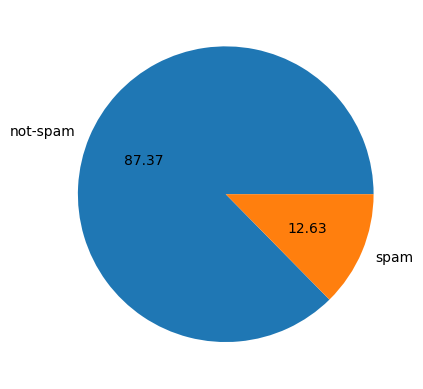

In [24]:
import matplotlib.pyplot as plt

plt.pie(sms_df['target'].value_counts(), labels=['not-spam', 'spam'], autopct="%0.2f")
plt.show()
# Data is imbalanced based on the chart


In [26]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/r0c0hjm/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [27]:
sms_df['character_length'] = sms_df['text'].apply(len)
sms_df.head(2)

/var/folders/8k/t70h1m4d0c3f8zbp2g4t1mx40000gq/T/ipykernel_2130/3894475518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sms_df['character_length'] = sms_df['text'].apply(len)


,target,text,character_length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29


In [28]:
sms_df['word_length'] = sms_df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
sms_df.head(2)

/var/folders/8k/t70h1m4d0c3f8zbp2g4t1mx40000gq/T/ipykernel_2130/1895458320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sms_df['word_length'] = sms_df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


,target,text,character_length,word_length
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8


In [29]:
sms_df['sentence_length'] = sms_df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
sms_df.head(2)

/var/folders/8k/t70h1m4d0c3f8zbp2g4t1mx40000gq/T/ipykernel_2130/1843904906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sms_df['sentence_length'] = sms_df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


,target,text,character_length,word_length,sentence_length
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [30]:
sms_df[['character_length', 'word_length', 'sentence_length']].describe()

,character_length,word_length,sentence_length
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# NON SPAM
sms_df[sms_df['target'] == 0][['character_length', 'word_length', 'sentence_length']].describe()

,character_length,word_length,sentence_length
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# SPAM
sms_df[sms_df['target'] == 1][['character_length', 'word_length', 'sentence_length']].describe()

,character_length,word_length,sentence_length
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='character_length', ylabel='Count'>

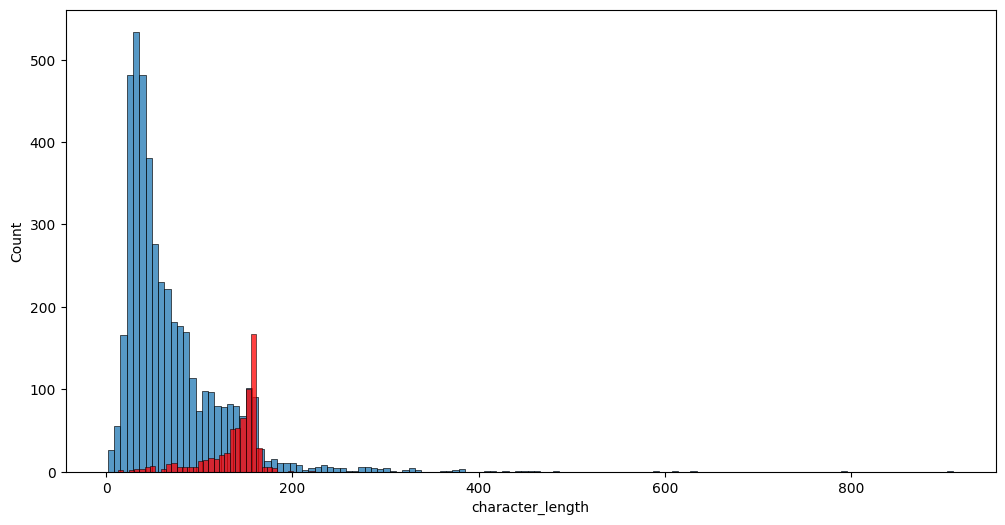

In [33]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(sms_df[sms_df['target'] == 0]['character_length'])
sns.histplot(sms_df[sms_df['target'] == 1]['character_length'], color='red')

<Axes: xlabel='word_length', ylabel='Count'>

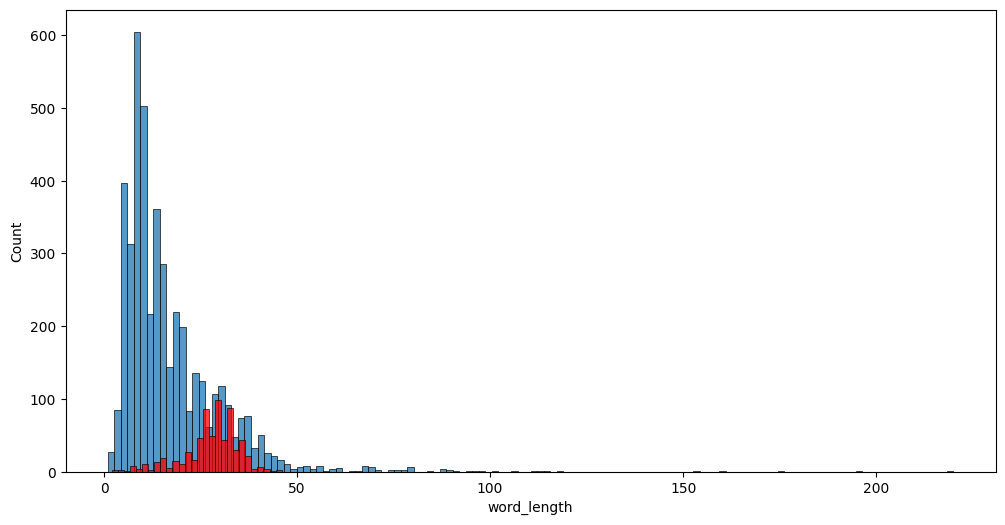

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(sms_df[sms_df['target'] == 0]['word_length'])
sns.histplot(sms_df[sms_df['target'] == 1]['word_length'], color='red')

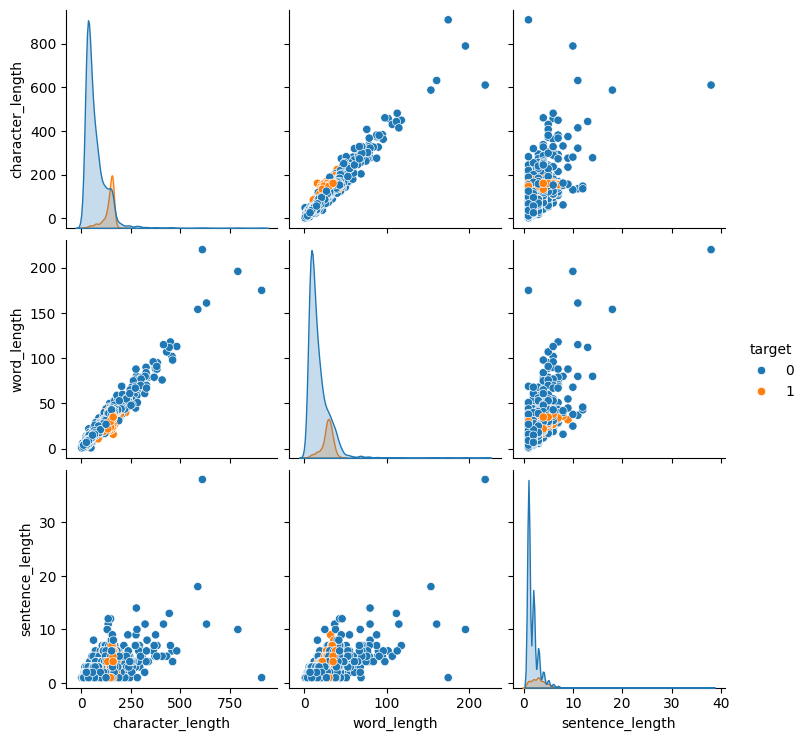

In [35]:
sns.pairplot(sms_df, hue='target')

<Axes: >

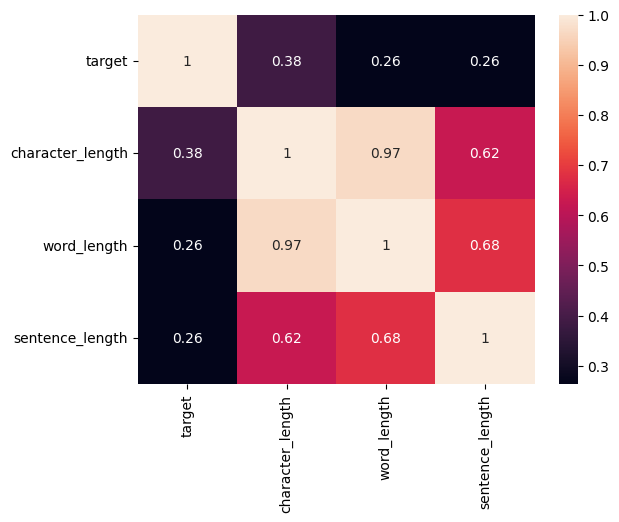

In [36]:
sns.heatmap(sms_df[['target','character_length', 'word_length', 'sentence_length']].corr(), annot=True)

# DATA PREPROCESSING

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/r0c0hjm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from string import punctuation

def transform_text(text):

    # LOWER CASING WORDS
    text = text.lower()

    # TOKANIZING WORDS
    text = nltk.word_tokenize(text)

    # REMOVING SPECIAL CHARACTERS
    res = []
    for i in text:
        if i.isalnum():
            res.append(i)
    
    # REMOVING STOP WORDS AND PUNCTUATION
    text = res[:]
    res.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in punctuation:
            res.append(i)

    # STEMMING
    text = res[:]
    res.clear()

    ps = PorterStemmer()
    for i in text:
        res.append(ps.stem(i))
    
    return " ".join(res)

In [39]:
transform_text("Ranajit is loved by me")

'ranajit love'

In [40]:
sms_df['transform_text'] = sms_df['text'].apply(transform_text)

/var/folders/8k/t70h1m4d0c3f8zbp2g4t1mx40000gq/T/ipykernel_2130/1096790586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sms_df['transform_text'] = sms_df['text'].apply(transform_text)


In [41]:
sms_df.head(2)

,target,text,character_length,word_length,sentence_length,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


In [42]:
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color='white')


In [43]:
spam_wc = wc.generate(sms_df[sms_df['target'] == 1]['transform_text'].str.cat(sep=" "))

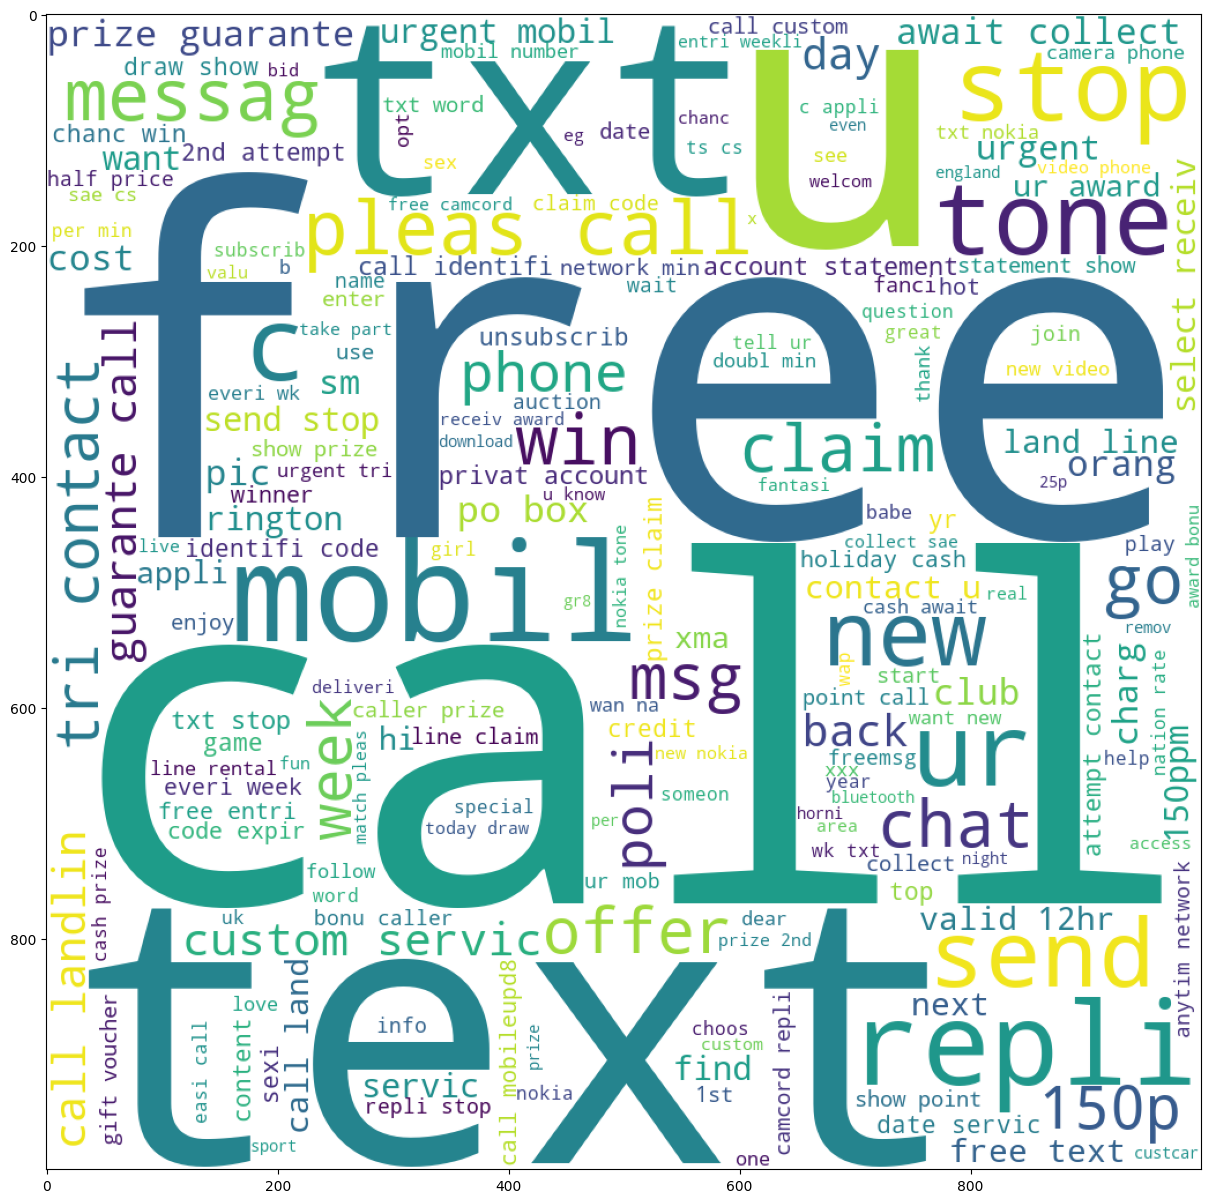

In [44]:
plt.figure(figsize=(15,15))
plt.imshow(spam_wc)

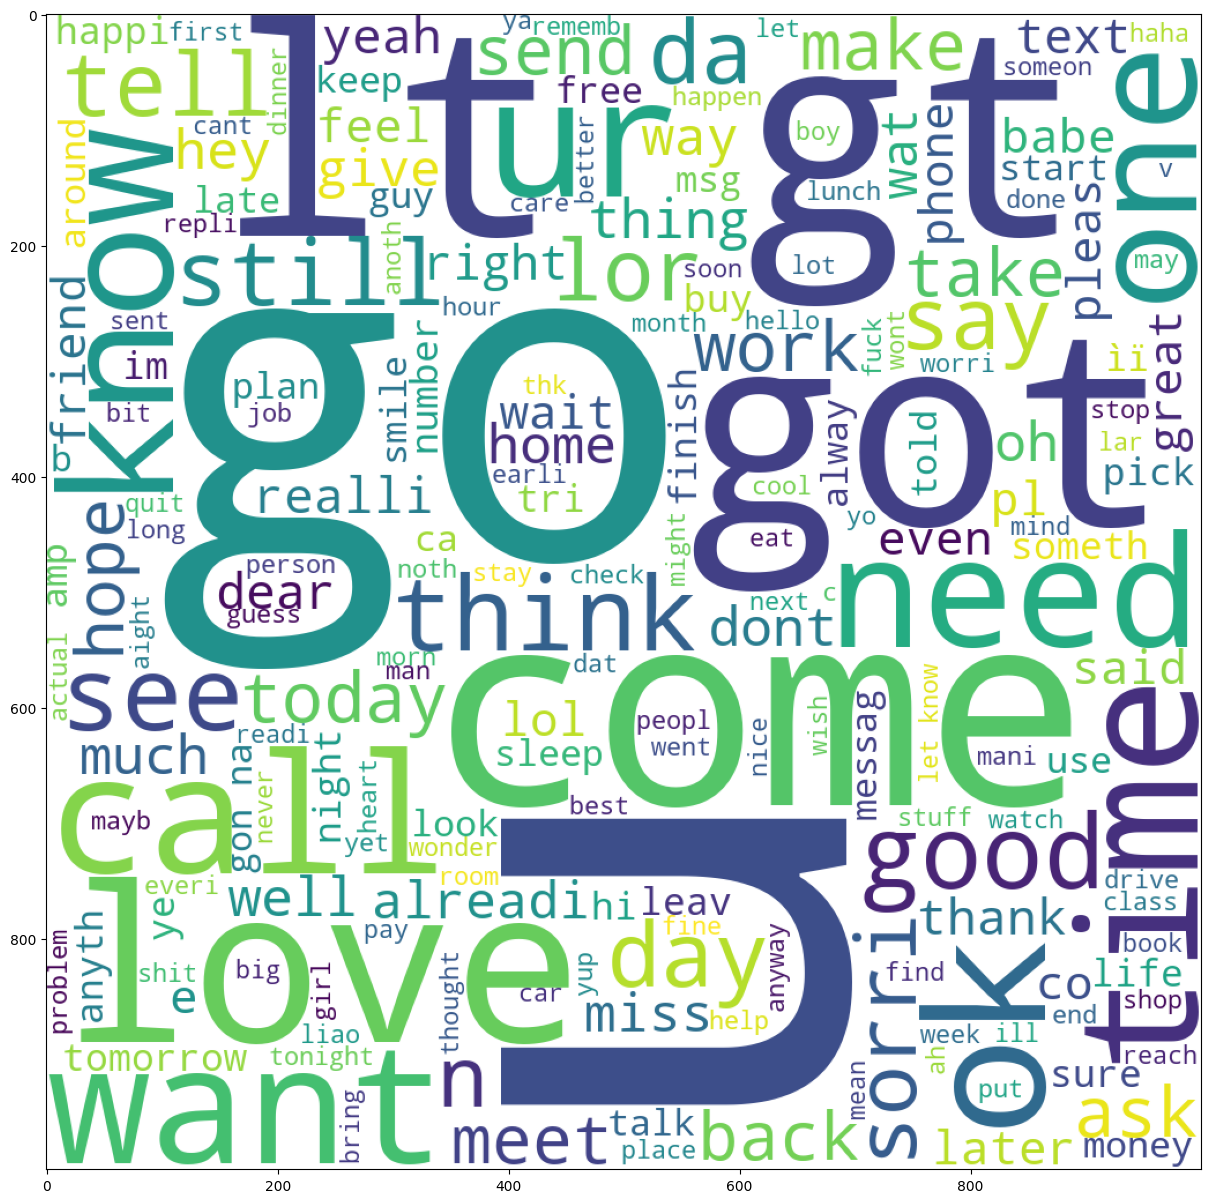

In [45]:
non_spam_wc = wc.generate(sms_df[sms_df['target'] == 0]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(15,15))
plt.imshow(non_spam_wc)

In [46]:
words_list = []
for words in sms_df[sms_df['target']==1]['transform_text']:
    for word in nltk.word_tokenize(words):
        words_list.append(word)

words_list_not_spam = []
for words in sms_df[sms_df['target']==0]['transform_text']:
    for word in nltk.word_tokenize(words):
        words_list_not_spam.append(word)

In [47]:
from collections import Counter
counter_spam = Counter(words_list).most_common(30)
counter_spam_df = pd.DataFrame(counter_spam)
print(counter_spam_df.head())

counter_not_spam = Counter(words_list_not_spam).most_common(30)
counter_not_spam_df = pd.DataFrame(counter_not_spam)
print(counter_not_spam_df.head())

      0    1
0  call  320
1  free  191
2     2  155
3   txt  141
4  text  122
     0    1
0    u  883
1   go  404
2  get  349
3   gt  288
4   lt  287


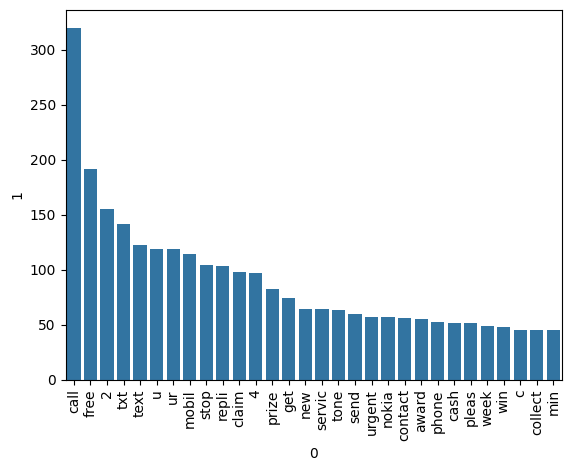

In [48]:
sns.barplot(x=counter_spam_df[0], y=counter_spam_df[1])
plt.xticks(rotation='vertical')
plt.show()

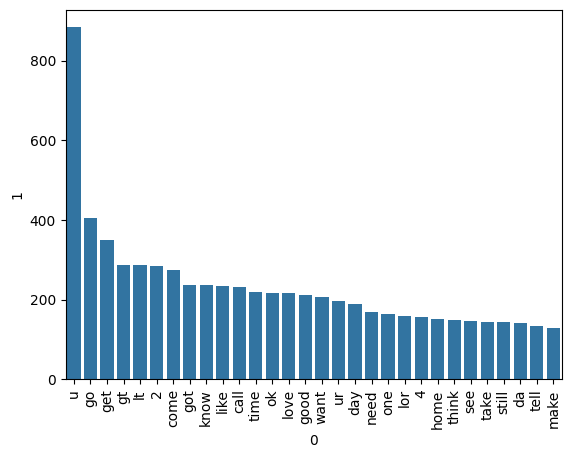

In [49]:
sns.barplot(x=counter_not_spam_df[0], y=counter_not_spam_df[1])
plt.xticks(rotation='vertical')
plt.show()

# MODEL BUILDING
* naive_bayes

# CountVectorizer METHOD FOR VECTORIZATION OF TEXT

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [51]:
X = cv.fit_transform(sms_df['transform_text']).toarray()

In [52]:
Y = sms_df['target'].values

In [53]:
print(X.shape)
print(Y.shape)

(5169, 6708)
(5169,)


In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(x_train, x_test, y_train, y_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0]


In [108]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import precision_score, confusion_matrix, accuracy_score
gau = GaussianNB()
ber = BernoulliNB()
mul = MultinomialNB()

In [109]:
gau.fit(x_train, y_train)
y_pred_1 = gau.predict(x_test)
print(accuracy_score(y_test,y_pred_1))
print(precision_score(y_test,y_pred_1))
print(confusion_matrix(y_test,y_pred_1))

0.8907156673114119
0.5615763546798029
[[807  89]
 [ 24 114]]


In [110]:
ber.fit(x_train, y_train)
y_pred_2 = ber.predict(x_test)
print(accuracy_score(y_test,y_pred_2))
print(precision_score(y_test,y_pred_2))
print(confusion_matrix(y_test,y_pred_2))

0.9835589941972921
0.991869918699187
[[895   1]
 [ 16 122]]


In [58]:
mul.fit(x_train, y_train)
y_pred_3 = mul.predict(x_test)
print(accuracy_score(y_test,y_pred_3))
print(precision_score(y_test,y_pred_3))
print(confusion_matrix(y_test,y_pred_3))

0.9642166344294004
0.8344370860927153
[[871  25]
 [ 12 126]]


# TfidfVectorizer METHOD FOR VECTORIZATION OF TEXT

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [112]:
X = tfidf.fit_transform(sms_df['transform_text']).toarray()
Y = sms_df['target'].values

# IMPROVEMENT NOT WORKING

# ScALING
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

# ADDING EXtrA COLUMN
# X = np.hstack((X, sms_df['character_length'].values.reshape(-1,1)))

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(x_train, x_test, y_train, y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0]


In [113]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import precision_score, confusion_matrix, accuracy_score
gau = GaussianNB()
ber = BernoulliNB()
mul = MultinomialNB()

gau.fit(x_train, y_train)
y_pred_1 = gau.predict(x_test)
print(accuracy_score(y_test,y_pred_1))
print(precision_score(y_test,y_pred_1))
print(confusion_matrix(y_test,y_pred_1))

ber.fit(x_train, y_train)
y_pred_2 = ber.predict(x_test)
print(accuracy_score(y_test,y_pred_2))
print(precision_score(y_test,y_pred_2))
print(confusion_matrix(y_test,y_pred_2))

mul.fit(x_train, y_train)
y_pred_3 = mul.predict(x_test)
print(accuracy_score(y_test,y_pred_3))
print(precision_score(y_test,y_pred_3))
print(confusion_matrix(y_test,y_pred_3))

0.8694390715667312
0.5068493150684932
[[788 108]
 [ 27 111]]
0.9835589941972921
0.991869918699187
[[895   1]
 [ 16 122]]
0.9709864603481625
1.0
[[896   0]
 [ 30 108]]


# Comparing Multiple ML models for performance

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, confusion_matrix, accuracy_score


In [89]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
lrc = LogisticRegression(solver='liblinear', penalty='l1')
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bgc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgbc = XGBClassifier(n_estimators=50, random_state=2)

In [90]:
classifiers = {
    'SVC': svc,
    'KNeighborsClassifier': knc,
    'LogisticRegression': lrc,
    'MultinomialNB': mnb,
    'DecisionTreeClassifier': dtc,
    'RandomForestClassifier': rfc,
    'AdaBoostClassifier': abc,
    'BaggingClassifier': bgc,
    'ExtraTreesClassifier': etc,
    'GradientBoostingClassifier': gbc,
    'XGBClassifier': xgbc
}

In [91]:
def train_classifier(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [83]:
train_classifier(svc, x_train, y_train, x_test, y_test)

(0.9690522243713733, 0.9274193548387096)

In [92]:
accuracy_scores = []
precision_scores = []

for name, clf in classifiers.items():
    accuracy, precision = train_classifier(clf, x_train, y_train, x_test, y_test)
    print("CLASSIFIER ", name)
    print('ACCURACY ', accuracy)
    print('PRECISION ', precision)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)


/Users/r0c0hjm/DATA_ML_TEAM/machine_learning/SPAM_SMS_DETECTOR/spam_sms/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


CLASSIFIER  SVC
ACCURACY  0.8665377176015474
PRECISION  0.0
CLASSIFIER  KNeighborsClassifier
ACCURACY  0.9342359767891683
PRECISION  0.8431372549019608
CLASSIFIER  LogisticRegression
ACCURACY  0.9613152804642167
PRECISION  0.9622641509433962
CLASSIFIER  MultinomialNB
ACCURACY  0.9410058027079303
PRECISION  1.0
CLASSIFIER  DecisionTreeClassifier
ACCURACY  0.9458413926499033
PRECISION  0.8867924528301887
CLASSIFIER  RandomForestClassifier
ACCURACY  0.9690522243713733
PRECISION  0.9818181818181818
CLASSIFIER  AdaBoostClassifier
ACCURACY  0.9468085106382979
PRECISION  0.9029126213592233
CLASSIFIER  BaggingClassifier
ACCURACY  0.9661508704061895
PRECISION  0.8992248062015504
CLASSIFIER  ExtraTreesClassifier
ACCURACY  0.9787234042553191
PRECISION  0.9754098360655737
CLASSIFIER  GradientBoostingClassifier
ACCURACY  0.9506769825918762
PRECISION  0.9306930693069307
CLASSIFIER  XGBClassifier
ACCURACY  0.9690522243713733
PRECISION  0.9416666666666667


In [85]:
performance_df = pd.DataFrame({'CLASSIFIER': classifiers.keys(), 'ACCURACY': accuracy_scores, 'PRECISION': precision_scores})
performance_df.sort_values('PRECISION', ascending=False)

,CLASSIFIER,ACCURACY,PRECISION
5,RandomForestClassifier,0.975822,0.982906
1,KNeighborsClassifier,0.905222,0.976190
8,ExtraTreesClassifier,0.974855,0.974576
2,LogisticRegression,0.967118,0.964286
3,MultinomialNB,0.978723,0.946154
0,SVC,0.969052,0.927419
10,XGBClassifier,0.967118,0.926230
9,GradientBoostingClassifier,0.946809,0.919192
7,BaggingClassifier,0.958414,0.868217
6,AdaBoostClassifier,0.924565,0.848837


In [99]:
# VOTING CLASSIFIER

svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier
vt = VotingClassifier(estimators=[('SVM', svc), ('nb', mnb), ('etc', etc)], voting='soft')

In [100]:
vt.fit(x_train, y_train)

VotingClassifier(estimators=[('SVM',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [101]:
y_pred = vt.predict(x_test)
print("accuracy", accuracy_score(y_test, y_pred))
print("precision", precision_score(y_test, y_pred))

accuracy 0.941972920696325
precision 1.0


In [102]:
# APPLING STACKING

estimators=[('SVM', svc), ('nb', mnb), ('etc', etc)]
final_estimetor = RandomForestClassifier()

In [103]:
from sklearn.ensemble import StackingClassifier
st = StackingClassifier(estimators=estimators, final_estimator=final_estimetor)

In [104]:
st.fit(x_train, y_train)

StackingClassifier(estimators=[('SVM',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True)),
                               ('nb', MultinomialNB()),
                               ('etc',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [107]:
y_pred = st.predict(x_test)
print("accuracy", accuracy_score(y_test, y_pred))
print("precision", precision_score(y_test, y_pred))
print(y_pred[0])

accuracy 0.9806576402321083
precision 0.9836065573770492
0


In [114]:
import pickle

pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mul, open('model.pkl', 'wb'))